Calvin Passmore

ECE 6600

# Lab 1

## Q.1
Re-write PL(d) in dB form, i.e, PL(d)[dB].

PL(d) = <sup>Pt</sup>/<sub>Pr(d)</sub>

PL(d)[dB] = 10 log<sub>10</sub>(<sup>Pt</sup>/<sub>Pr(d)</sub>)

## Q.2
Set the frequency as 1500 MHz, x-axis is the distance from 1 m to 1000 m (log-scale), y-axis is the PL(d)[dB]. Please compare three different antenna configurations. [Gt = 1,Gr = 1], [Gt = 1,Gr = 0.5] and [Gt = 0.5,Gr = 0.5] and plot them in the same figure. 
Please discuss what factors can affect path loss?

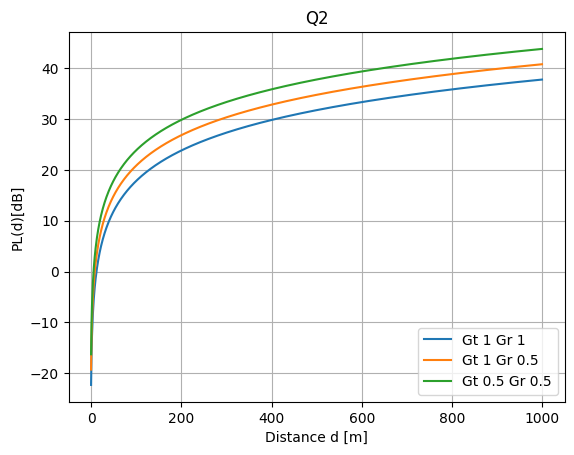

In [13]:
import matplotlib.pyplot as plt
from math import log10, pi

c = 299792458 # Speed of light
Freq = 1500e3 # Hz
Pt = 10 # Watts
L = 1.5 # Loss Factor >= 1
wavelength = c/Freq
gains = [[1,1], [1, 0.5], [0.5, 0.5]] # [Gt, Gr]
plt.figure()

for Gt,Gr in gains:
    PLdB = []
    for d in range(1,1000 + 1):
        Pr = (Pt * Gt * Gr * wavelength**2) / ((4 * pi)**2 * d**2 * L)
        PLdB.append(10 * log10(Pt / Pr))
    plt.plot(PLdB)
plt.legend([f"Gt {gains[0][0]} Gr {gains[0][1]}", f"Gt {gains[1][0]} Gr {gains[1][1]}", f"Gt {gains[2][0]} Gr {gains[2][1]}"])
plt.ylabel(f"PL(d)[dB]")
plt.xlabel(f"Distance d [m]")
plt.title("Q2")
plt.grid()
plt.show()
    

The factors that affect path loss are the transmit and receive gains, the distance the signal must travel, and the frequency of the signal.
The less gain the transmitter and/or receiver have, the more path loss there will be.
The more distance the signal must travel, the signal is being lost at an exponential rate.
The frequency of the signal also affects it (although it's not plotted), the higher the frequency the more path loss there is.